### Churn.csv dataset - Chrurn detection process

### Problem Statement:


In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!

#### Aim :
- To classify the potential churn customers based on numerical and categorical features.
- It is a binary classification problem for an imbalanced dataset.

-- https://www.durgasoftonline.com/s/courses/6683c272b9a6691bde2a2cec/take

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

### Data Dictionary:

- `customerID` : Customer ID
- `gender` : Whether the customer is a male or a female
- `SeniorCitizen` : Whether the customer is a senior citizen or not (1, 0)
- `Partner` : Whether the customer has a partner or not (Yes, No)
- `Dependents` : Whether the customer has dependents or not (Yes, No)
- `tenure` : Number of months the customer has stayed with the company
- `PhoneService` : Whether the customer has a phone service or not (Yes, No)
- `MultipleLines` : Whether the customer has multiple lines or not (Yes, No, No phone service)
- `InternetService` : Customer’s internet service provider (DSL, Fiber optic, No)
- `OnlineSecurity` : Whether the customer has online security or not (Yes, No, No internet service)
- `OnlineBackup` : Whether the customer has online backup or not (Yes, No, No internet service)
- `DeviceProtection` : Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport` : Whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV` : Whether the customer has streaming TV or not (Yes, No, No internet service)
- `StreamingMovies` : Whether the customer has streaming movies or not (Yes, No, No internet service)
- `Contract` : The contract term of the customer (Month-to-month, One year, Two year)
- `PaperlessBilling` : Whether the customer has paperless billing or not (Yes, No)
- `PaymentMethod` : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges` : The amount charged to the customer monthly
- `TotalCharges` : The total amount charged to the customer
- `Churn` : Whether the customer churned or not (Yes or No)

In [52]:
df = pd.read_csv('/Users/DRepani/Documents/Datasets/churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- As we observed the list of columns , `customerID` columns its not use for predictions.so better drop the `customerID` drop the column.

In [54]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- There are no null values on data.

In [55]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- There are total : 7043 samples on dataset and 21 columns.
- 3 numerical columns are: monthlycharges, tenure and seniorcitizen
- 18 columns are categorical columns.
- Here the challeges:
  - TotalCharges are updated as object datatype instead of numerical datatype

-- Convert TotalCharges to float datatype .

In [56]:
df['TotalCharges'].astype('float64')

ValueError: could not convert string to float: ' '

- convert got failed due to TotalCharges having " " empty values due to that we are unable to process 

 - ValueError: could not convert string to float: ' '

In [14]:
# findout number empty() values on TotalCharges

df['TotalCharges'].isnull().sum() # tried with `isna and isnull` both are not giving any data for null.

np.int64(0)

In [15]:
# check using where condition:

df[df.TotalCharges==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- We have observed 11 rows are having empty data on `TotalCharges`
- If you observe the above data , only TotalCharges updated as empty only for `tenure` is 0 value.

In [16]:
# Check 

df.tenure.value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [19]:
# We can also perform using below query:

df[df.tenure==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- Same 11 records got it.
- May be customers are register for services due some issues they may be cancelled the services.
- With the all analasis , better those 11 records can be dropped as there are no usage with those .
  - tenure = 0 , if tenure is 0 that mean customer didnt used the service
  - Totalcharges didnt generated 
  - churn also updated NO

- So better its required to drop the 11 records and as well as its required to drop the `customerID` field as well because this field wont play any role.

In [58]:
# Dropping 'customerID' field from dataset.

df.drop(labels='customerID',axis=1, inplace=True)

In [59]:
# Now drop all 11 rows which are having tenure=0

df.drop(df[df.tenure==0].index,axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

- After execution of drop for 11 rows , now we got 7032 expected rows. but index is not updated accordingly , then we have to use axis=0 and inplace=True

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [61]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7031,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


- Now its looks good., now we can convert `TotalCharges` to float datatype.

In [62]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


- As we observed the , above 3 fields are the numerical fields and rest of all are catagarical fields.

In [30]:
np.sum(df.TotalCharges>0) # all records are in >0


np.int64(7032)

In [33]:
# check if any negative values:

np.sum(df.TotalCharges < 0)

np.int64(0)

In [64]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

- If we observe the data above data, it's completely inbalanced dataset , if dataset has inbalanced dataset then machine wont learn properly , we have to make it balanced dataset.

- There are two ways we can make the dataset as balanced data.

- 1. upsampling (if sample's are very less then we have to do upsampling)
- 2. downsampling (if sample's are more then we have to do downsampling)

- If you observe the columnnames , some are in Camelcases and some are in lowercases and some are in different cases so better all columns single case so it will be easy for calling columns.

- Visualize the data for `churn` dataset:

In [66]:
df.columns = [i.lower() for i in df.columns]

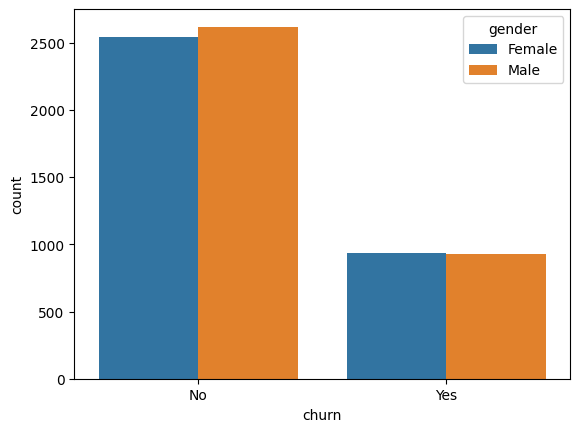

In [67]:
sns.countplot(data=df, x='churn',hue='gender')
plt.show()

In [68]:
# Data analasys on continuos datasets:

df.groupby('churn').describe()[['tenure', 'monthlycharges']]

tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
churn                                                              
No     5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0   
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      monthlycharges                                                     \
               count       mean        std    min    25%    50%     75%   
churn                                                                     
No            5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475   
Yes           1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200   

               
          max  
churn          
No     118.75  
Yes    118.35

- With the above statistics analysis , we came to know that below observations:
    - No of chrun customers: 1869
    - No of non chrun customers : 5174 
    - Average chrun customers stayed : 17 months with the services 
    - but where as non churn customers : 37 months.
    - 50% of customers left service with in 10 months.
    - If you observe the monthlycharges are high due to that reason as well customers left the service.
    

- If the customers stayed a long period of time then there is no meaning for using those customers data in analysis.
- We can take the data whoever stayed minimum 24 months with service . we won't consider if customers stayed more than 24 months with company.

In [71]:
df[df.tenure< 24].churn.value_counts()

churn
No     1797
Yes    1308
Name: count, dtype: int64

- If you observe the above results , we are almost balanced the classes . 

In [72]:
df[df.tenure< 24].churn.value_counts(normalize=True)

churn
No     0.578744
Yes    0.421256
Name: proportion, dtype: float64